### Sujal Aggarwal 231047

In [ ]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd

In [ ]:
#Loading Datasets
fake_news=pd.read_csv(r"Fake.csv")
true_news=pd.read_csv(r"True.csv")

In [ ]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_news.shape

(21417, 4)

In [ ]:
fake_news.shape

(23481, 4)

In [ ]:
#Merging the two datasets to form a master dataset
true_news['label']=1
fake_news['label']=0

com=[true_news,fake_news]
dataset=pd.concat(com,ignore_index=True)

In [ ]:
dataset.shape

(44898, 5)

In [ ]:
#Importing the libraries required
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
#Downloading the Packages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import nltk
from zipfile import ZipFile
import urllib.request

# Define URLs and paths
url = 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/tokenizers/punkt.zip'
zip_path = '/root/nltk_data/punkt.zip'
extract_path = '/root/nltk_data/tokenizers/punkt'

# Download punkt.zip
urllib.request.urlretrieve(url, zip_path)

# Unzip the file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/root/nltk_data/tokenizers')


In [ ]:
nltk.data.path.append('/root/nltk_data')


In [ ]:
from nltk.tokenize import sent_tokenize

text = "Hello world. This is a test."
print(sent_tokenize(text))


['Hello world.', 'This is a test.']


In [ ]:
#Data Processing and Organizing
def data_processing(text):
    text=text.lower()

    text=re.sub(r'[^\w\s]','',text)

    tokens=word_tokenize(text)

    stop_words=set(stopwords.words('english'))
    tokens=[word for word in tokens if word not in stop_words]

    stemmer=PorterStemmer()
    tokens=[stemmer.stem(word) for word in tokens]

    text = ' '.join([WordNetLemmatizer().lemmatize(word) for word in tokens])
    return text

In [ ]:
dataset['text']=dataset['text'].apply(data_processing)

In [ ]:
#Importing the required functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(dataset['text']).toarray()
y = dataset['label']

In [ ]:
#Dataset Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Model Building and Training
def model_building(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return best_model, acc, f1, cm

In [ ]:
#Logistic Regression
param_grid = {'C': [1, 10]}  # fewer params = less memory
lr_model, lr_acc, lr_f1, lr_cm = model_building(
    LogisticRegression(solver='liblinear', max_iter=1000),
    param_grid
)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ................................................C=1; total time=   2.4s
[CV] END ................................................C=1; total time=   2.8s
[CV] END ................................................C=1; total time=   2.9s
[CV] END ................................................C=1; total time=   3.2s
[CV] END ................................................C=1; total time=   2.2s
[CV] END ...............................................C=10; total time=   3.2s
[CV] END ...............................................C=10; total time=   3.1s
[CV] END ...............................................C=10; total time=   3.5s
[CV] END ...............................................C=10; total time=   3.4s
[CV] END ...............................................C=10; total time=   2.9s
Best Parameters: {'C': 10}
Accuracy: 0.9929844097995546
F1 Score: 0.992732725804591
Confusion Matrix:
 [[4614   36]
 [  27 4303]]


In [ ]:
#Random Forest Classifier
param_grid = {'n_estimators': [50, 100, 200]}
rf_model, rf_acc, rf_f1, rf_cm = model_building(RandomForestClassifier(), param_grid)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ....................................n_estimators=50; total time=  33.2s
[CV] END ....................................n_estimators=50; total time=  31.2s
[CV] END ....................................n_estimators=50; total time=  30.6s
[CV] END ....................................n_estimators=50; total time=  32.2s
[CV] END ....................................n_estimators=50; total time=  31.6s
[CV] END ...................................n_estimators=100; total time= 1.0min
[CV] END ...................................n_estimators=100; total time= 1.0min
[CV] END ...................................n_estimators=100; total time= 1.0min
[CV] END ...................................n_estimators=100; total time= 1.0min
[CV] END ...................................n_estimators=100; total time= 1.0min
[CV] END ...................................n_estimators=200; total time= 2.0min
[CV] END ...................................n_est

In [ ]:
#Decision Tree Classifier
param_grid = {'max_depth': [10, 20, 30]}
dt_model, dt_acc, dt_f1, dt_cm = model_building(DecisionTreeClassifier(), param_grid)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .......................................max_depth=10; total time=  25.4s
[CV] END .......................................max_depth=10; total time=  25.8s
[CV] END .......................................max_depth=10; total time=  25.9s
[CV] END .......................................max_depth=10; total time=  25.7s
[CV] END .......................................max_depth=10; total time=  25.7s
[CV] END .......................................max_depth=20; total time=  50.6s
[CV] END .......................................max_depth=20; total time=  50.4s
[CV] END .......................................max_depth=20; total time=  49.7s
[CV] END .......................................max_depth=20; total time=  49.8s
[CV] END .......................................max_depth=20; total time=  50.1s
[CV] END .......................................max_depth=30; total time= 1.0min
[CV] END .......................................m

In [ ]:
#Gradient Boosting
param_grid = {'n_estimators': [50], 'learning_rate': [0.1, 0.2]}
gb_model, gb_acc, gb_f1, gb_cm = model_building(GradientBoostingClassifier(), param_grid)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................learning_rate=0.1, n_estimators=50; total time= 6.3min
[CV] END .................learning_rate=0.1, n_estimators=50; total time= 6.3min
[CV] END .................learning_rate=0.1, n_estimators=50; total time= 6.3min
[CV] END .................learning_rate=0.1, n_estimators=50; total time= 6.3min
[CV] END .................learning_rate=0.1, n_estimators=50; total time= 6.3min
[CV] END .................learning_rate=0.2, n_estimators=50; total time= 6.4min
[CV] END .................learning_rate=0.2, n_estimators=50; total time= 6.3min
[CV] END .................learning_rate=0.2, n_estimators=50; total time= 6.4min
[CV] END .................learning_rate=0.2, n_estimators=50; total time= 6.5min
[CV] END .................learning_rate=0.2, n_estimators=50; total time= 6.5min
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 50}
Accuracy: 0.9947661469933184
F1 Score: 0.9945808832007379
Confusion Ma

In [ ]:
#Evaluation Metrics
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
acc = [lr_acc, rf_acc, dt_acc, gb_acc]
f1 = [lr_f1, rf_f1, dt_f1, gb_f1]

In [ ]:
import matplotlib.pyplot as plt

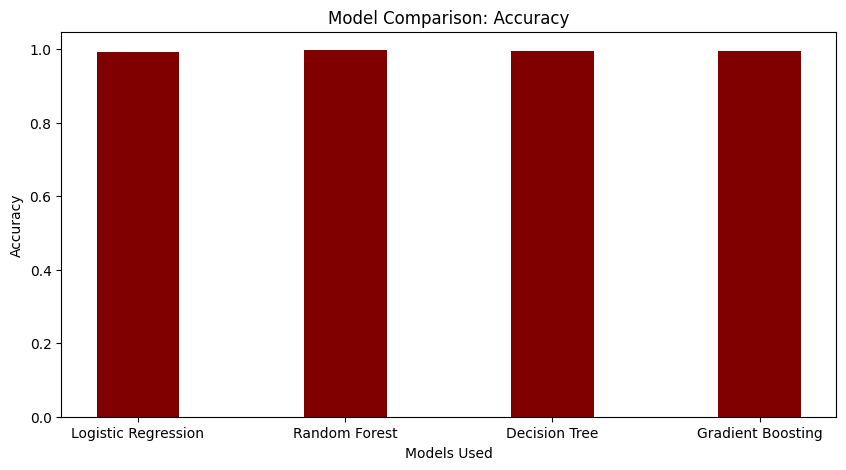

In [ ]:
#Comparing the Evaluation Results through Bar Graph
fig = plt.figure(figsize = (10, 5))

plt.bar(models,acc, color ='maroon',
        width = 0.4)

plt.xlabel("Models Used")
plt.ylabel("Accuracy")
plt.title("Model Comparison: Accuracy")
plt.show()

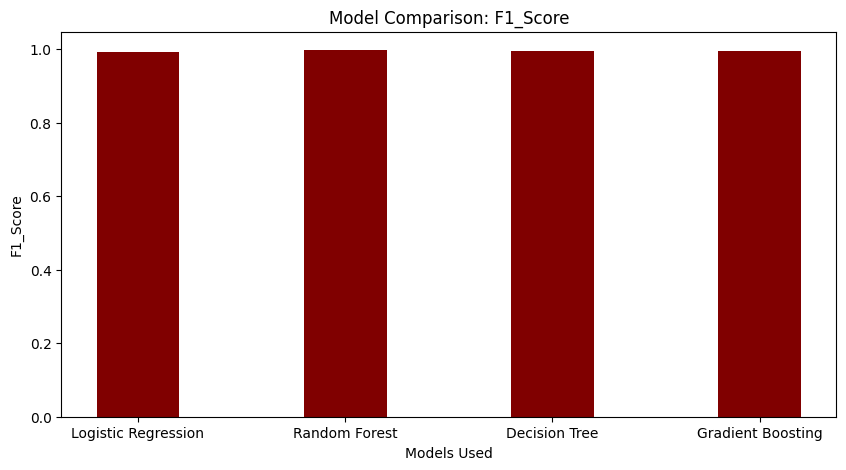

In [ ]:
fig1 = plt.figure(figsize = (10, 5))

plt.bar(models,f1, color ='maroon',
        width = 0.4)

plt.xlabel("Models Used")
plt.ylabel("F1_Score")
plt.title("Model Comparison: F1_Score")
plt.show()